---
title: "Image Basics"
navtitle: "Image Basics (NB)"
subtitle: "Introducation to Image Processing"
description: "Overview of image properties and their manipulation."
format:
  html:
    page-layout: full
    title-block-banner: true
---

Notebook goals:


- Exploration of image properties, focused on understanding pixels
- Introduce Pillow and numpy image processing
- Understand how many data points create an image

Note: PIL is better for working with image data in many cases, however the use of np arrays can faciiliate querying the data and understanding what makes an image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Set display size for all images in the notebook
from IPython.display import display, HTML
display(HTML("<style>.jp-RenderedImage { max-width: 400px; max-height: 400px; }</style>"))

## Meet Pixpix

This little pixie contains over 4 million values! 

We'll load the image and begin exploring the properties the create this "simple" image.

### Load Image into Multiple Formats

Variable names will indicate the data format, and numeric values the steps along the way.

Remember the type command in Python can always confirm the data type.

In [3]:
pwd

'/Users/dsl/Documents/Work/pixel-process/foundations'

In [4]:
image_path = ('../assets/images/pixpix.png')

In [5]:
# Load image as a PIL Image
img_0 = Image.open(image_path)

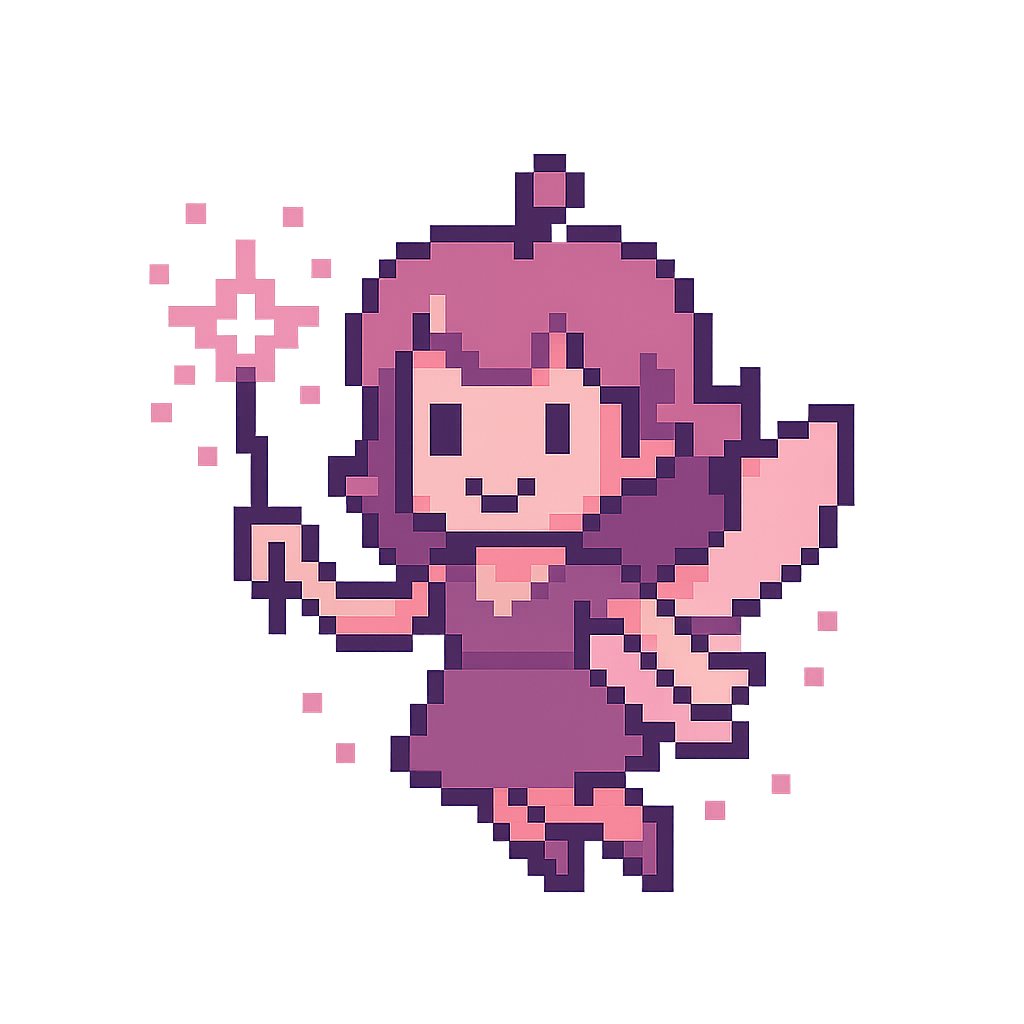

In [6]:
# Display image
img_0

In [7]:
type(img_0)

PIL.PngImagePlugin.PngImageFile

### Create an Array Version

In [8]:
arr_0 = np.array(img_0)

In [9]:
type(arr_0)

numpy.ndarray

In [10]:
# np.size will return the total number of elements in an array
np.size(arr_0)

4194304

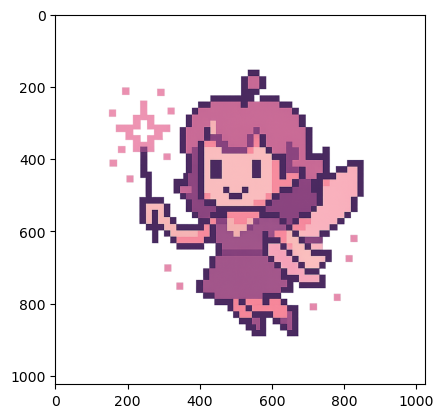

In [11]:
plt.imshow(arr_0)

## Image Properties

Let's see what data exists for Pixpix in these two formats.

### Numpy Array

[Shape](https://numpy.org/doc/stable/reference/generated/numpy.shape.html) provides the number of dimensions and element count for each.

This image consists of a 1024x1024 pixel grid, with 4 values per pixel. 

In [12]:
arr_0.shape

(1024, 1024, 4)

Arrays dimensions and elements can be selected with `[]` notation. 

For long arrays, the head and tail will be shown.

Also note, a shape and data type is shown for each.

In [13]:
arr_0[0]

array([[20, 16, 17,  0],
       [19, 16, 16,  0],
       [19, 16, 16,  0],
       ...,
       [10,  9, 11,  0],
       [11,  9, 11,  0],
       [ 9,  9, 10,  0]], shape=(1024, 4), dtype=uint8)

In [14]:
arr_0[1]

array([[19, 16, 16,  0],
       [18, 16, 15,  0],
       [20, 16, 18,  0],
       ...,
       [ 8,  8,  9,  0],
       [ 9, 10, 11,  0],
       [10, 11, 11,  0]], shape=(1024, 4), dtype=uint8)

In [15]:
# Remember, Python uses a 0 based indexing system
# So arr_0[0] is valid, but the below fails
arr_0[1024]

IndexError: index 1024 is out of bounds for axis 0 with size 1024

### Chained Indexing

Indexing can be used to create new subset arrays, to assign values, or chained to drill down into data.

In [16]:
# These 4 values create the first pixel (top left corner)
arr_0[0][0]

array([20, 16, 17,  0], dtype=uint8)

In [17]:
arr_0[0][0][0]

np.uint8(20)

### Subset Arrays

This is functionally equivalent to the above.

Not the proper approach depends on goals.

In [18]:
arr_0[0]

array([[20, 16, 17,  0],
       [19, 16, 16,  0],
       [19, 16, 16,  0],
       ...,
       [10,  9, 11,  0],
       [11,  9, 11,  0],
       [ 9,  9, 10,  0]], shape=(1024, 4), dtype=uint8)

In [19]:
arr_0_0 = arr_0[0]

In [20]:
arr_0_0

array([[20, 16, 17,  0],
       [19, 16, 16,  0],
       [19, 16, 16,  0],
       ...,
       [10,  9, 11,  0],
       [11,  9, 11,  0],
       [ 9,  9, 10,  0]], shape=(1024, 4), dtype=uint8)

In [21]:
print(f"Shape of arr_0: {arr_0.shape}")
print(f"Shape of arr_0[0]: {arr_0[0].shape}")
print(f"Shape of arr_0_0: {arr_0_0.shape}")

Shape of arr_0: (1024, 1024, 4)
Shape of arr_0[0]: (1024, 4)
Shape of arr_0_0: (1024, 4)


### PIL Image

The img_0 stores the same pixel information, but in a different format.

See the [PIL Docs](https://pillow.readthedocs.io/en/stable) for more details!

In [22]:
type(img_0)

PIL.PngImagePlugin.PngImageFile

In [23]:
print(f"Format: {img_0.format}")
print(f"Mode: {img_0.mode}")
print(f"Size (WxH): {img_0.size}")
print(f"Total Pixels: {img_0.size[0] * img_0.size[1]}")

Format: PNG
Mode: RGBA
Size (WxH): (1024, 1024)
Total Pixels: 1048576


Here we see that the image is a png, matching the input file type.

The mode is red, green, blue, alpha (RGBA). These are the 4 values that define each pixel-more on this later. 

The pixel grid is 1024x1024, meaning over a million total pixels.

## Reducing Complexity

- Create a greyscale version
- Drop pixels
- Filter values

In [24]:
# Convert to greyscale
img_1 = img_0.convert("L")

In [25]:
type(img_1)

PIL.Image.Image

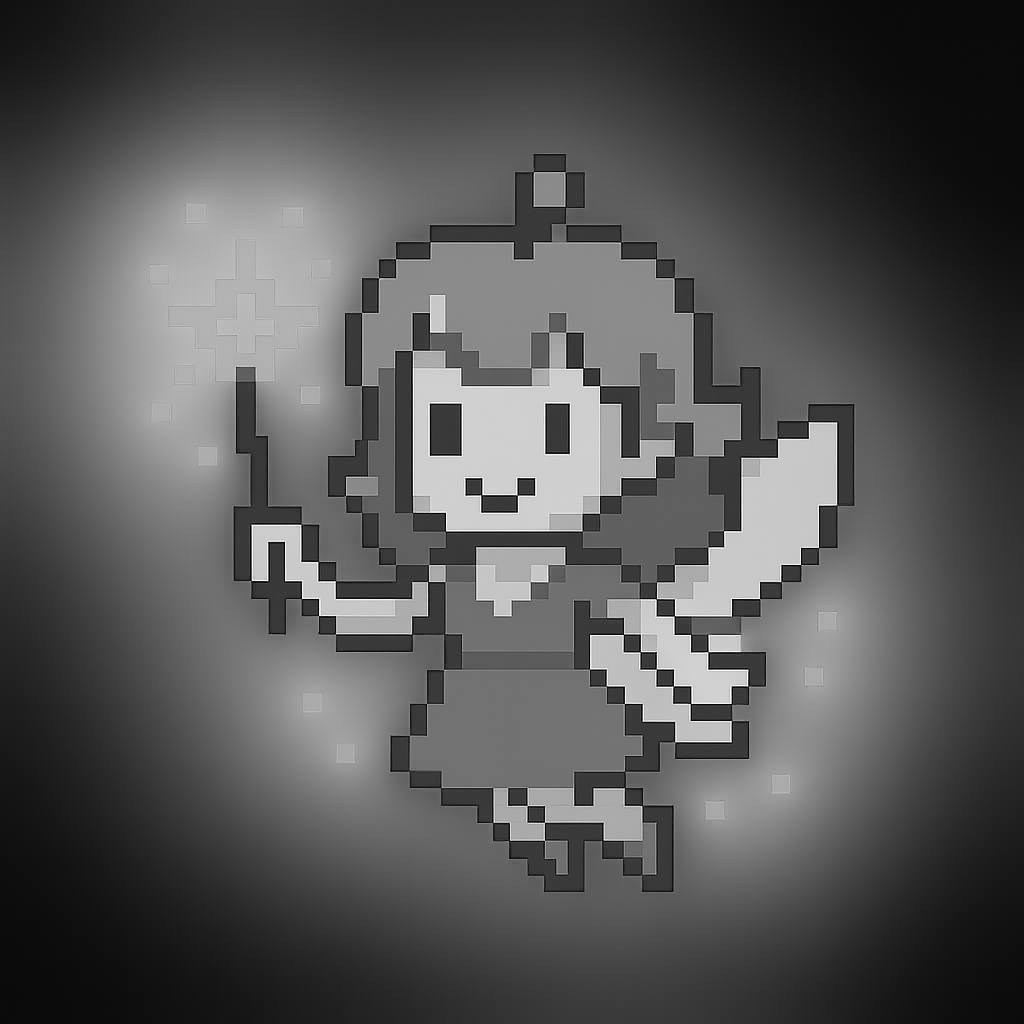

In [26]:
img_1

#### Convert to Array

Show with plt.imshow

In [27]:
arr_1 = np.array(img_1)

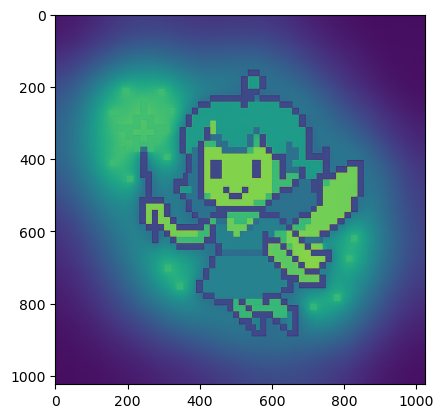

In [28]:
plt.imshow(arr_1)

Why isn't the image in greyscale? 

By default, imshow does not use a greyscale to map values.

Below we see how the colors map and then apply the proper color scale.

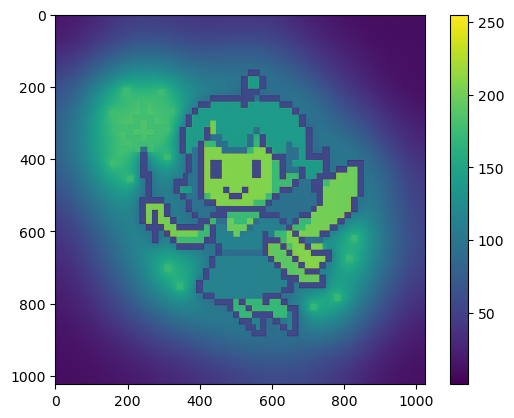

In [29]:
plt.imshow(arr_1)
plt.colorbar()

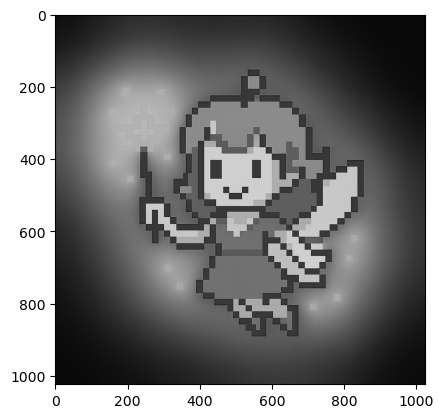

In [30]:
plt.imshow(arr_1, cmap='grey')

#### 25% Less Data

Let's inspect how this transformation changed the data.

We'll compare arr_0 (original) and arr_1 (greyscale). 

In [31]:
print(f"Original shape: {arr_0.shape}")
print(f"Original size: {arr_0.size}")
print(f"Greyscale shape: {arr_1.shape}")
print(f"Greyscale shape: {arr_1.size}")

Original shape: (1024, 1024, 4)
Original size: 4194304
Greyscale shape: (1024, 1024)
Greyscale shape: 1048576


In [32]:
100*(arr_1.size/arr_0.size)

25.0

### Color Channel Manipulation

The original image is in RGBA, providing 4 values/pixel.

Red, Green, Blue, and Alpha.

Alpha controls transparency.

#### Remove Alpha

In [33]:
arr_2 = arr_0[:, :, :3]

In [34]:
print(f"RGBA shape: {arr_0.shape}")
print(f"RGBA size: {arr_0.size}")
print(f"RGB shape: {arr_2.shape}")
print(f"RGB shape: {arr_2.size}")

RGBA shape: (1024, 1024, 4)
RGBA size: 4194304
RGB shape: (1024, 1024, 3)
RGB shape: 3145728


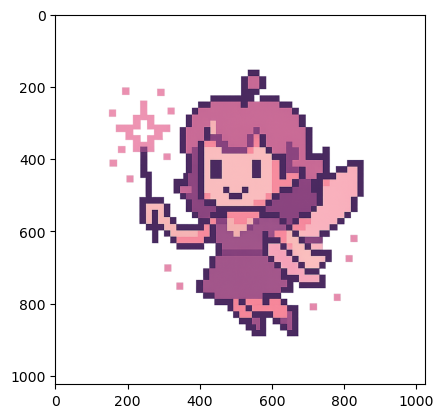

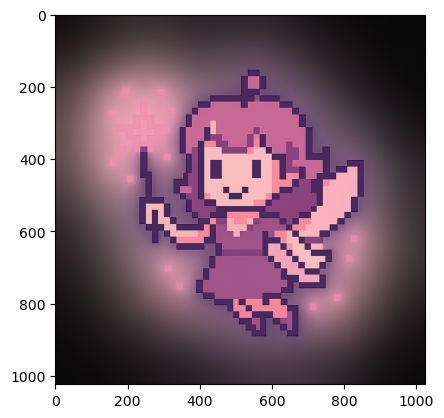

In [35]:
plt.imshow(arr_0)
plt.show()
plt.imshow(arr_2)
plt.show()

#### Without alpha to control transparency, all RGB colors are solid

In [36]:
red_only = arr_2.copy()
red_only[:, :, 1] = 0   # zero green
red_only[:, :, 2] = 0   # zero blue

In [37]:
green_only = arr_2.copy()
green_only[:, :, 0] = 0 # zero red
green_only[:, :, 2] = 0 # zero blue

In [38]:
blue_only = arr_2.copy()
blue_only[:, :, 0] = 0  # zero red
blue_only[:, :, 1] = 0  # zero green

In [39]:
# Make copies for maxed-out channels
red_max = arr_2.copy()
red_max[:, :, 0] = 255

green_max = arr_2.copy()
green_max[:, :, 1] = 255

blue_max = arr_2.copy()
blue_max[:, :, 2] = 255

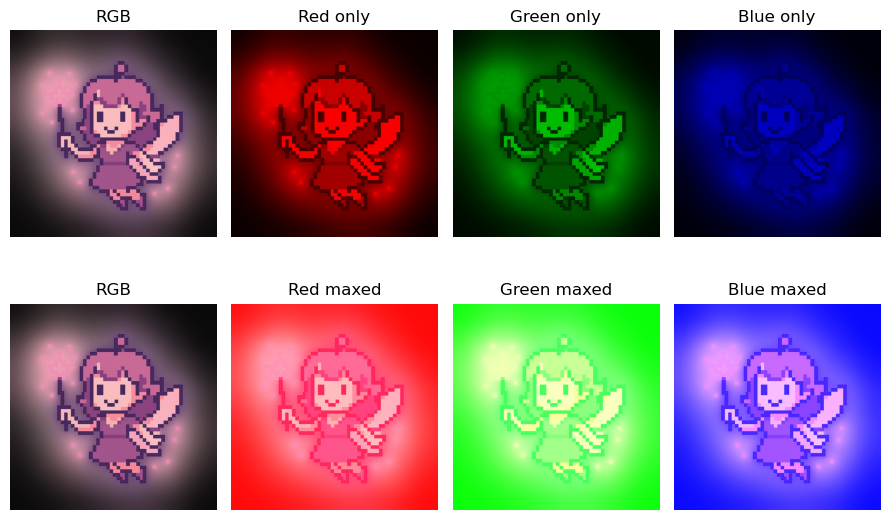

In [40]:
# Plot results
fig, axes = plt.subplots(2, 4, figsize=(9, 6))

axes[0, 0].imshow(arr_2);   axes[0, 0].set_title("RGB")
axes[0, 1].imshow(red_only);   axes[0, 1].set_title("Red only")
axes[0, 2].imshow(green_only); axes[0, 2].set_title("Green only")
axes[0, 3].imshow(blue_only);  axes[0, 3].set_title("Blue only")

axes[1, 0].imshow(arr_2);   axes[1, 0].set_title("RGB")
axes[1, 1].imshow(red_max);    axes[1, 1].set_title("Red maxed")
axes[1, 2].imshow(green_max);  axes[1, 2].set_title("Green maxed")
axes[1, 3].imshow(blue_max);   axes[1, 3].set_title("Blue maxed")

for ax in axes.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()

# Image Basics Review

- Loaded an image
  - PIL and Numpy formats
  - Checked data structure, pixel grid, and pixel components
- Explored how RGBA channels work
  - Created a greyscale version (75% data reduction!)
  - Removed alpha to convert image to RGB
  - Plotted image with each channel isolated and maxed out
- **Bonuses**:
  - Created fancy subplots
  - Figured out Pixpix is much more complicated than at first glance